# Pandas library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_datareader import data

/home/gillouche/workspace/exploratory-data-analysis/venv-exploratory-data-analysis/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Options and settings

https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

can configure the max_rows, max_columns and all other configs.

In [2]:
pd.options.display.max_rows = 10

In [3]:
pd.get_option('precision')

6

In [4]:
df = pd.DataFrame(np.random.randn(5, 5))
df.head()

,0,1,2,3,4
0,-0.095322,-0.317858,0.779513,1.083370,-1.046379
1,0.871866,-1.296462,0.686792,-0.479176,1.184517
2,0.629026,-1.635747,-0.101352,-2.717344,0.789081
3,1.311322,0.998098,1.874766,0.128163,0.946042
4,0.314515,0.819859,1.163644,0.081676,0.507699


In [5]:
pd.set_option("precision", 2)

In [6]:
df.head()

,0,1,2,3,4
0,-0.10,-0.32,0.78,1.08,-1.05
1,0.87,-1.30,0.69,-0.48,1.18
2,0.63,-1.64,-0.10,-2.72,0.79
3,1.31,1.00,1.87,0.13,0.95
4,0.31,0.82,1.16,0.08,0.51


In [7]:
pd.set_option("precision", 6)

In [8]:
df.head()

,0,1,2,3,4
0,-0.095322,-0.317858,0.779513,1.083370,-1.046379
1,0.871866,-1.296462,0.686792,-0.479176,1.184517
2,0.629026,-1.635747,-0.101352,-2.717344,0.789081
3,1.311322,0.998098,1.874766,0.128163,0.946042
4,0.314515,0.819859,1.163644,0.081676,0.507699


## DataFrame

Series - 1D dataframe

DataFrame - 2D dataframe

In [9]:
df = pd.Series([30, 35, 40],
               index=['2015 Sales', '2016 Sales', '2017 Sales'],
               name='Product A')
df

2015 Sales    30
2016 Sales    35
2017 Sales    40
Name: Product A, dtype: int64

In [10]:
30 in df.values

True

In [11]:
df = pd.DataFrame(
    {'Bob': ['I liked it', 'It was awful'],
     'Sue': ['Pretty good', 'Blank']},
    index=['Product A', 'Product B']
)
df

,Bob,Sue
Product A,I liked it,Pretty good
Product B,It was awful,Blank


In [12]:
# when we don't want to mess with an existing dataframe data
copy = df.copy()
copy.head()

,Bob,Sue
Product A,I liked it,Pretty good
Product B,It was awful,Blank


In [13]:
copy["Bob"] = "new value"
copy.head()

,Bob,Sue
Product A,new value,Pretty good
Product B,new value,Blank


In [14]:
df.head()

,Bob,Sue
Product A,I liked it,Pretty good
Product B,It was awful,Blank


In [15]:
numpy_array = pd.Series([1, 2, 3]).values

In [16]:
numpy_array != 2

array([ True, False,  True])

In [17]:
numpy_array[numpy_array != 2]

array([1, 3])

In [18]:
df = pd.DataFrame({
    'A': pd.Series([100, 200, 300], index=["apple", "pear", "orange"]),
    'B': pd.Series([111, 222, 333, 444], index=["apple", "pear", "orange", "melon"])
})
df

,A,B
apple,100.0,111
melon,NaN,444
orange,300.0,333
pear,200.0,222


In [19]:
df.axes

[Index(['apple', 'melon', 'orange', 'pear'], dtype='object'),
 Index(['A', 'B'], dtype='object')]

In [20]:
df.index

Index(['apple', 'melon', 'orange', 'pear'], dtype='object')

In [21]:
df.columns

Index(['A', 'B'], dtype='object')

### Create dataframe from file

Can read data from several input

* read_csv()
* read_excel()
* read_pickle()
* read_json()
* read_parquet()
* read_orc()
* read_sql()
* read_html() (simple data scraping)
* ...

In [22]:
df = pd.read_csv('data/wine.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [23]:
df = pd.read_csv('data/wine.csv', index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [24]:
df = pd.read_csv('data/wine.csv')
df.set_index('Unnamed: 0')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


### Data access

In [25]:
def read_data():
    return pd.read_csv('data/wine.csv', index_col=0)

In [26]:
df = read_data()
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [27]:
df.get(key="does not exist", default="nothing")

'nothing'

In [28]:
df.get(key="description")

0         This tremendous 100% varietal wine hails from ...
1         Ripe aromas of fig, blackberry and cassis are ...
2         Mac Watson honors the memory of a wine once ma...
3         This spent 20 months in 30% new French oak, an...
4         This is the top wine from La Bégude, named aft...
                                ...                        
150925    Many people feel Fiano represents southern Ita...
150926    Offers an intriguing nose with ginger, lime an...
150927    This classic example comes from a cru vineyard...
150928    A perfect salmon shade, with scents of peaches...
150929    More Pinot Grigios should taste like this. A r...
Name: description, Length: 150930, dtype: object

In [29]:
df.tail()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset
150929,Italy,More Pinot Grigios should taste like this. A r...,NaN,90,15.0,Northeastern Italy,Alto Adige,NaN,Pinot Grigio,Alois Lageder


In [30]:
df.country

0             US
1          Spain
2             US
3             US
4         France
           ...  
150925     Italy
150926    France
150927     Italy
150928    France
150929     Italy
Name: country, Length: 150930, dtype: object

In [31]:
df.country[0]

'US'

In [32]:
df['country']

0             US
1          Spain
2             US
3             US
4         France
           ...  
150925     Italy
150926    France
150927     Italy
150928    France
150929     Italy
Name: country, Length: 150930, dtype: object

In [33]:
df['country'][0]

'US'

In [34]:
# counts 10th rows, 0th column
df.iat[0, 0]

'US'

In [35]:
# index 0, column description
df.at[0, "description"]

'This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.'

In [36]:
df.sort_values("price", ascending=False).head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour
13318,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Chardonnay,Blair
34922,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux


In [37]:
df.nlargest(n=3, columns=["price"])

,country,description,designation,points,price,province,region_1,region_2,variety,winery
34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour
13318,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Chardonnay,Blair
34922,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux


In [38]:
df.nsmallest(n=3, columns=["price"])

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1858,US,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.0,California,California,California Other,Chardonnay,Pam's Cuties
25645,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Merlot,Bandit
34415,Spain,This opens with standard cherry and berry arom...,NaN,84,4.0,Levante,Yecla,NaN,Cabernet Sauvignon,Terrenal


### Select subsets

When selecting a subset of muliple columns, it is faster to first take the subset and then the columns we want

If we only want a subset of one column, it is faster to first retrieve the column and then take a subset.

In [39]:
%%time
df[['country', 'province']][:5]

CPU times: user 2.37 ms, sys: 0 ns, total: 2.37 ms
Wall time: 2.12 ms


,country,province
0,US,California
1,Spain,Northern Spain
2,US,California
3,US,Oregon
4,France,Provence


In [40]:
%%time
df[:5][['country', 'province']]

CPU times: user 686 µs, sys: 256 µs, total: 942 µs
Wall time: 907 µs


,country,province
0,US,California
1,Spain,Northern Spain
2,US,California
3,US,Oregon
4,France,Provence


In [41]:
%%time
df['country'][:5]

CPU times: user 167 µs, sys: 62 µs, total: 229 µs
Wall time: 231 µs


0        US
1     Spain
2        US
3        US
4    France
Name: country, dtype: object

In [42]:
%%time
df[:5]['country']

CPU times: user 378 µs, sys: 0 ns, total: 378 µs
Wall time: 356 µs


0        US
1     Spain
2        US
3        US
4    France
Name: country, dtype: object

#### iloc

select data based on its numerical position in the data (row first, column second)

iloc is exclusive so 0:1000 returns 1000 entries

In [43]:
df.iloc[0]

country                                                       US
description    This tremendous 100% varietal wine hails from ...
designation                                    Martha's Vineyard
points                                                        96
price                                                        235
province                                              California
region_1                                             Napa Valley
region_2                                                    Napa
variety                                       Cabernet Sauvignon
winery                                                     Heitz
Name: 0, dtype: object

In [44]:
df.iloc[:, 0]

0             US
1          Spain
2             US
3             US
4         France
           ...  
150925     Italy
150926    France
150927     Italy
150928    France
150929     Italy
Name: country, Length: 150930, dtype: object

In [45]:
df.iloc[[0, 1, 2], 0]

0       US
1    Spain
2       US
Name: country, dtype: object

#### loc

label based selection

loc is inclusive so 0:1000 returns 1001 entries

In [46]:
df.loc[:, ['country', 'province']]

,country,province
0,US,California
1,Spain,Northern Spain
2,US,California
3,US,Oregon
4,France,Provence
...,...,...
150925,Italy,Southern Italy
150926,France,Champagne
150927,Italy,Southern Italy
150928,France,Champagne


### Reverse dataframe

In [47]:
df = read_data()
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [48]:
df[::-1]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
150929,Italy,More Pinot Grigios should taste like this. A r...,NaN,90,15.0,Northeastern Italy,Alto Adige,NaN,Pinot Grigio,Alois Lageder
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
...,...,...,...,...,...,...,...,...,...,...
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez


### Filtering with conditional selection

In [49]:
df = read_data()
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [50]:
condition = df.country == 'Italy'
df.loc[condition].head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,90,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga
35,Italy,"Forest floor, tilled soil, mature berry and a ...",Riserva,90,135.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Carillon
37,Italy,"Aromas of forest floor, violet, red berry and ...",NaN,90,29.0,Tuscany,Vino Nobile di Montepulciano,NaN,Sangiovese,Avignonesi
38,Italy,"This has a charming nose that boasts rose, vio...",NaN,90,23.0,Tuscany,Chianti Classico,NaN,Sangiovese,Casina di Cornia


In [51]:
italy_condition = df.country == 'Italy'
points_gt90_condition = df.points >= 90

df.loc[italy_condition & points_gt90_condition].head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,90,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga
35,Italy,"Forest floor, tilled soil, mature berry and a ...",Riserva,90,135.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Carillon
37,Italy,"Aromas of forest floor, violet, red berry and ...",NaN,90,29.0,Tuscany,Vino Nobile di Montepulciano,NaN,Sangiovese,Avignonesi
38,Italy,"This has a charming nose that boasts rose, vio...",NaN,90,23.0,Tuscany,Chianti Classico,NaN,Sangiovese,Casina di Cornia


In [52]:
condition = (df.country == 'Italy') | (df.points >= 90)
df.loc[condition].head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [53]:
condition = df.country.isin(['Italy', 'France'])
df.loc[condition].head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
13,France,This wine is in peak condition. The tannins an...,Château Montus Prestige,95,90.0,Southwest France,Madiran,NaN,Tannat,Vignobles Brumont
18,France,Coming from a seven-acre vineyard named after ...,Le Pigeonnier,95,290.0,Southwest France,Cahors,NaN,Malbec,Château Lagrézette
32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,90,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga


In [54]:
df[df.variety.duplicated()]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [55]:
# also works with dates, times, ...
df[df.price.between(50, 100)]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
...,...,...,...,...,...,...,...,...,...,...
150909,France,"This is a lovely, fragrant Burgundy, with a sm...",Clos dea Argillieres,89,52.0,Burgundy,Nuits-St.-Georges,NaN,Pinot Noir,Daniel Rion
150912,France,The nose is dominated by the attractive scents...,Les Charmes,87,65.0,Burgundy,Chambolle-Musigny,NaN,Pinot Noir,Daniel Rion
150916,US,An impressive wine that presents a full bouque...,J. Schram,93,65.0,California,Napa Valley,Napa,Champagne Blend,Schramsberg
150924,France,"Really fine for a low-acid vintage, there's an...",Diamant Bleu,91,70.0,Champagne,Champagne,NaN,Champagne Blend,Heidsieck & Co Monopole


In [56]:
# return null for all rows that do not match the condition
df.where(df.price.between(50, 100))

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96.0,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96.0,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95.0,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90.0,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [57]:
df.query('country == "US"')

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
...,...,...,...,...,...,...,...,...,...,...
150892,US,"A light, earthy wine, with violet, berry and t...",Coastal,82,10.0,California,California,California Other,Merlot,Callaway
150896,US,"Some raspberry fruit in the aroma, but things ...",NaN,82,10.0,California,California,California Other,Pinot Noir,Camelot
150914,US,"Old-gold in color, and thick and syrupy. The a...",Late Harvest Cluster Select,94,25.0,California,Anderson Valley,Mendocino/Lake Counties,White Riesling,Navarro
150915,US,"Decades ago, Beringer’s then-winemaker Myron N...",Nightingale,93,30.0,California,North Coast,North Coast,White Blend,Beringer


### Data types

* object: str or mixed for text or numeric and non numeric values
* int64: integer numbers
* float64: floating point numbers
* bool: True/False values
* datetime64: date and time values
* timedelta: difference between two datetimes
* category: finite list of text values. Note that sometimes numbers can also be considered a category, for example a year in mmove releasse.



In [58]:
df = pd.DataFrame({
    'str column': ['text 1', 'text 2'],
    'integer column': [42, 32],
    'boolean column': [True, False],
    'float column': [12.0, 35.0],
    'date time column': ['2017-03-22 15:16:45', '2020-03-22 09:16:45'],
    'epoch seconds column': [0, 5],
    'category column':  ['category_a', 'category_b']
})
df.head()

,str column,integer column,boolean column,float column,date time column,epoch seconds column,category column
0,text 1,42,True,12.0,2017-03-22 15:16:45,0,category_a
1,text 2,32,False,35.0,2020-03-22 09:16:45,5,category_b


In [59]:
df["category column"] = df["category column"].astype('category')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   str column            2 non-null      object  
 1   integer column        2 non-null      int64   
 2   boolean column        2 non-null      bool    
 3   float column          2 non-null      float64 
 4   date time column      2 non-null      object  
 5   epoch seconds column  2 non-null      int64   
 6   category column       2 non-null      category
dtypes: bool(1), category(1), float64(1), int64(2), object(2)
memory usage: 308.0+ bytes


In [61]:
df["category column"].cat.categories

Index(['category_a', 'category_b'], dtype='object')

In [62]:
df['date time column'] = df['date time column'].astype('datetime64')
df['category column'] = df['category column'].astype('category')
df['epoch seconds column'] = pd.to_datetime(df['epoch seconds column'], unit='s')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   str column            2 non-null      object        
 1   integer column        2 non-null      int64         
 2   boolean column        2 non-null      bool          
 3   float column          2 non-null      float64       
 4   date time column      2 non-null      datetime64[ns]
 5   epoch seconds column  2 non-null      datetime64[ns]
 6   category column       2 non-null      category      
dtypes: bool(1), category(1), datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 308.0+ bytes


In [63]:
df.head()

,str column,integer column,boolean column,float column,date time column,epoch seconds column,category column
0,text 1,42,True,12.0,2017-03-22 15:16:45,1970-01-01 00:00:00,category_a
1,text 2,32,False,35.0,2020-03-22 09:16:45,1970-01-01 00:00:05,category_b


In [64]:
df.dtypes

str column                      object
integer column                   int64
boolean column                    bool
float column                   float64
date time column        datetime64[ns]
epoch seconds column    datetime64[ns]
category column               category
dtype: object

In [65]:
# there are lots of properties for .dt such as day of week, month, if it is the last day of the months etc
# also checks pd.DateOffset, timeries offsets, timedelta, ...
df['year'] = df['date time column'].dt.year
df['month'] = df['date time column'].dt.month
df['day'] = df['date time column'].dt.day
df['weekday'] = df['date time column'].dt.weekday # 0 is Monday, 6 is Sunday
df['hours'] = df['date time column'].dt.hour
df['minutes'] = df['date time column'].dt.minute
df['seconds'] = df['date time column'].dt.second
df.head()

,str column,integer column,boolean column,float column,date time column,epoch seconds column,category column,year,month,day,weekday,hours,minutes,seconds
0,text 1,42,True,12.0,2017-03-22 15:16:45,1970-01-01 00:00:00,category_a,2017,3,22,2,15,16,45
1,text 2,32,False,35.0,2020-03-22 09:16:45,1970-01-01 00:00:05,category_b,2020,3,22,6,9,16,45


In [66]:
df.dtypes

str column                  object
integer column               int64
boolean column                bool
float column               float64
date time column    datetime64[ns]
                         ...      
day                          int64
weekday                      int64
hours                        int64
minutes                      int64
seconds                      int64
Length: 14, dtype: object

In [67]:
def get_column_by_types(dataframe):
    return {
        "numerical": list(dataframe.select_dtypes(include=['int64', 'float64']).columns),
        "bool": list(dataframe.select_dtypes(include=["bool"]).columns),
        "object": list(dataframe.select_dtypes(include=['object']).columns),
        "datetime": list(dataframe.select_dtypes(include=["datetime64"]).columns),
        "category": list(dataframe.select_dtypes(include=["category"]).columns)
    }


In [68]:
import pprint

col_type_dict = get_column_by_types(df)
pprint.pprint(col_type_dict)

{'bool': ['boolean column'],
 'category': ['category column'],
 'datetime': ['date time column', 'epoch seconds column'],
 'numerical': ['integer column',
               'float column',
               'year',
               'month',
               'day',
               'weekday',
               'hours',
               'minutes',
               'seconds'],
 'object': ['str column']}


### Timestamps, date, time

* Timestamp object:
* DatetimeIndex

In [69]:
ts = pd.Timestamp("2015-03-31 6:13:29 PM", tz="Europe/Brussels")
ts

Timestamp('2015-03-31 18:13:29+0200', tz='Europe/Brussels')

In [70]:
ts - pd.Timedelta(days=3)

Timestamp('2015-03-28 17:13:29+0100', tz='Europe/Brussels')

In [71]:
dates = ["2016/01/02", "2016-04-02"]
pd.DatetimeIndex(dates)

DatetimeIndex(['2016-01-02', '2016-04-02'], dtype='datetime64[ns]', freq=None)

In [72]:
pd.Series(data=[100, 200], index=pd.DatetimeIndex(dates))

2016-01-02    100
2016-04-02    200
dtype: int64

In [73]:
df = pd.read_csv('data/popularity_contest.tsv', sep=' ')
df.columns= ['atime', 'ctime', 'package-name', 'mru-program', 'tag']
df.head()

,atime,ctime,package-name,mru-program,tag
0,1387295797,1367633260,perl-base,/usr/bin/perl,NaN
1,1387295796,1354370480,login,/bin/su,NaN
2,1387295743,1354341275,libtalloc2,/usr/lib/x86_64-linux-gnu/libtalloc.so.2.0.7,NaN
3,1387295743,1387224204,libwbclient0,/usr/lib/x86_64-linux-gnu/libwbclient.so.0,<RECENT-CTIME>
4,1387295742,1354341253,libselinux1,/lib/x86_64-linux-gnu/libselinux.so.1,NaN


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898 entries, 0 to 2897
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   atime         2898 non-null   object
 1   ctime         2898 non-null   object
 2   package-name  2897 non-null   object
 3   mru-program   2897 non-null   object
 4   tag           1124 non-null   object
dtypes: object(5)
memory usage: 113.3+ KB


In [75]:
drop_condition_atime = (df.atime == '0') | (df.atime == 'END-POPULARITY-CONTEST-0')
df = df.drop(df[drop_condition_atime].index)

In [76]:
df.atime = df.atime.astype('int64')
df.ctime = df.ctime.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 0 to 2097
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   atime         2098 non-null   int64 
 1   ctime         2098 non-null   int64 
 2   package-name  2098 non-null   object
 3   mru-program   2098 non-null   object
 4   tag           1124 non-null   object
dtypes: int64(2), object(3)
memory usage: 98.3+ KB


In [77]:
df[:1]

,atime,ctime,package-name,mru-program,tag
0,1387295797,1367633260,perl-base,/usr/bin/perl,NaN


In [78]:
df.atime = pd.to_datetime(df.atime, unit='s')
df.ctime = pd.to_datetime(df.ctime, unit='s')
df[:1]

,atime,ctime,package-name,mru-program,tag
0,2013-12-17 15:56:37,2013-05-04 02:07:40,perl-base,/usr/bin/perl,NaN


In [79]:
pd.to_datetime("2001-04-19")

Timestamp('2001-04-19 00:00:00')

In [80]:
dates = ["hello", "2012/01/02"]
pd.to_datetime(dates, errors="coerce")

DatetimeIndex(['NaT', '2012-01-02'], dtype='datetime64[ns]', freq=None)

In [81]:
pd.date_range(start="2016-01-01", end="2016-01-15", freq="D")

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14', '2016-01-15'],
              dtype='datetime64[ns]', freq='D')

In [82]:
pd.date_range(start="2016", end="2017", freq="M")

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

In [83]:
# only create fridays
pd.date_range(start="2016-01-01", end="2016-02-01", freq="W-FRI")

DatetimeIndex(['2016-01-01', '2016-01-08', '2016-01-15', '2016-01-22',
               '2016-01-29'],
              dtype='datetime64[ns]', freq='W-FRI')

In [84]:
pd.date_range(start="2016-01-01", end="2016-01-02", freq="4H")

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 04:00:00',
               '2016-01-01 08:00:00', '2016-01-01 12:00:00',
               '2016-01-01 16:00:00', '2016-01-01 20:00:00',
               '2016-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

### Summary functions

In [85]:
df = read_data()

In [86]:
# check correlation between numerical features
df.corr()

,points,price
points,1.000000,0.459863
price,0.459863,1.000000


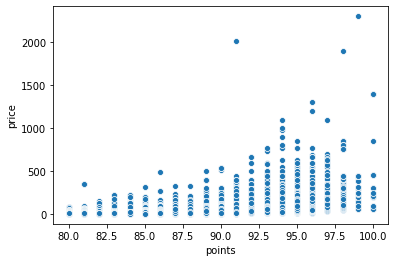

In [87]:
sns.scatterplot(x='points', y='price', data=df)

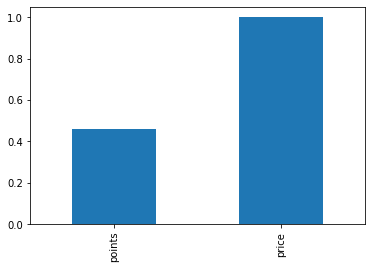

In [88]:
# this gives much better results with lots of numerical features since we see negative correlation and positive correlation better
df.corr()["price"].sort_values().plot(kind='bar')

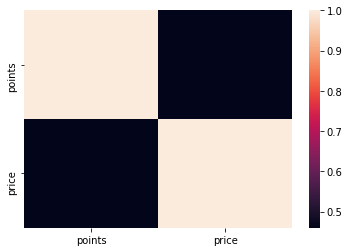

In [89]:
sns.heatmap(df.corr())

In [90]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


describe() function will show statistics about the numerical values in the dataframe when applied on the dataframe

We can get other columns by specifying them

In [91]:
df.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [92]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
points,150930.0,87.888418,3.222392,80.0,86.0,88.0,90.0,100.0
price,137235.0,33.131482,36.322536,4.0,16.0,24.0,40.0,2300.0


In [93]:
df.country.describe()

count     150925
unique        48
top           US
freq       62397
Name: country, dtype: object

In [94]:
df.points.mean()

87.8884184721394

In [95]:
df.country.unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [96]:
len(df.country.unique())

49

In [97]:
# count the number of unique values, drops NA by default
df.country.nunique(dropna=False)

49

In [98]:
country_counnts = df.country.value_counts().head()
country_counnts

US        62397
Italy     23478
France    21098
Spain      8268
Chile      5816
Name: country, dtype: int64

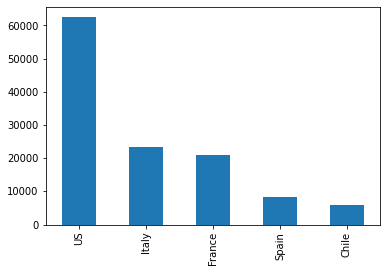

In [99]:
country_counnts.plot(kind='bar')

In [100]:
df.price.min()

4.0

In [101]:
df.price.idxmin()

1858

In [102]:
df.iloc[1858]

country                                                       US
description    Sweet and fruity, this canned wine feels soft ...
designation                                              Unoaked
points                                                        83
price                                                          4
province                                              California
region_1                                              California
region_2                                        California Other
variety                                               Chardonnay
winery                                              Pam's Cuties
Name: 1858, dtype: object

### Change or create data

In [103]:
df = read_data()
df['description'] = 'no description'
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,no description,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,no description,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,no description,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,no description,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,no description,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [104]:
df = read_data()
df['index_backwards'] = range(len(df), 0, -1)
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,index_backwards
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,150930
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,150929
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,150928
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,150927
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,150926


#### Map and apply function

map() function that takes one set of values and maps them to another set of values

The function in map expects a single argument as input and returns a single output, this function is applied element wise in the dataframe and map returns a Series with all the values from function

apply() function is the equivalent of map if we want to transform a whole DataFrame with a function on each row

The argument axis can have two values

* index: the function needs to apply transformation to a column
* columns: the function needs to apply transformation to a row

Pandas has built in functions for all Python operators: >, <, ==, ... which are much faster. Builtins also works with concatenation of string

In [105]:
df = read_data()
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [106]:
points_mean = df.points.mean()

remean_points = lambda p: p - points_mean

In [107]:
%%time
df['points_with_map'] = df.points.map(remean_points)
df.head()

CPU times: user 61.1 ms, sys: 3.6 ms, total: 64.7 ms
Wall time: 64.2 ms


,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_with_map
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,8.111582
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,8.111582
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,8.111582
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,8.111582
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,7.111582


In [108]:
%%time
df['points_with_builtin'] = df.points - points_mean
df.head()

CPU times: user 3.21 ms, sys: 0 ns, total: 3.21 ms
Wall time: 2.06 ms


,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_with_map,points_with_builtin
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,8.111582,8.111582
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,8.111582,8.111582
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,8.111582,8.111582
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,8.111582,8.111582
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,7.111582,7.111582


In [109]:
df['points_equality'] = df.points_with_map == df.points_with_builtin
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_with_map,points_with_builtin,points_equality
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,8.111582,8.111582,True
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,8.111582,8.111582,True
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,8.111582,8.111582,True
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,8.111582,8.111582,True
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,7.111582,7.111582,True


In [110]:
df = read_data()
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [111]:
points_price = lambda row: row.points * row.price 

In [112]:
%%time
df['points_price'] = df.apply(points_price, axis='columns')
df.head()

CPU times: user 3.39 s, sys: 12.3 ms, total: 3.4 s
Wall time: 3.41 s


,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_price
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,22560.0
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,10560.0
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,8640.0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,6240.0
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,6270.0


In [113]:
%%time
df['points_price_builin'] = df.points * df.price
df.head()

CPU times: user 2.32 ms, sys: 0 ns, total: 2.32 ms
Wall time: 1.52 ms


,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_price,points_price_builin
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,22560.0,22560.0
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,10560.0,10560.0
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,8640.0,8640.0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,6240.0,6240.0
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,6270.0,6270.0


In [114]:
df['country_province'] = df.country + "_" + df.province
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_price,points_price_builin,country_province
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,22560.0,22560.0,US_California
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,10560.0,10560.0,Spain_Northern Spain
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,8640.0,8640.0,US_California
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,6240.0,6240.0,US_Oregon
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,6270.0,6270.0,France_Provence


### Missing data



#### Check if there is missing data

In [115]:
df = pd.read_csv('data/kickstarter.csv')
df.isnull().any()

ID                  False
name                 True
category            False
main_category       False
currency            False
                    ...  
backers             False
country             False
usd pledged          True
usd_pledged_real    False
usd_goal_real       False
Length: 15, dtype: bool

#### Find all rows with missing data

In [116]:
df = pd.read_csv('data/kickstarter.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [117]:
nan_rows = df[df.isnull().T.any().T]
nan_rows

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378233,997971307,"EQUUS International Film Festival®, all-equine...",Film & Video,Film & Video,USD,2015-02-03,7500.0,2014-12-05 04:19:14,10.00,undefined,0,"N,0""",NaN,10.00,7500.00
378303,998319149,Emily 2050 - Short Film,Film & Video,Film & Video,CAD,2014-05-23,3000.0,2014-04-08 00:30:09,3102.00,undefined,0,"N,0""",NaN,2845.61,2752.04
378434,9988744,Matthew Stephens Music,Music,Music,USD,2016-02-05,5000.0,2016-01-06 21:59:23,235.00,undefined,0,"N,0""",NaN,235.00,5000.00
378585,999610349,Lady Vendredi: Afrofuturist concept 12 inch EP,Music,Music,GBP,2015-10-19,2000.0,2015-09-21 22:33:18,2125.00,undefined,0,"N,0""",NaN,3273.36,3080.81


#### Get NaN in specific column 

In [118]:
df = read_data()

In [119]:
condition = df.price.isnull()
df.loc[condition].head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,90,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga
56,France,"Delicious while also young and textured, this ...",Le Pavé,90,NaN,Loire Valley,Sancerre,NaN,Sauvignon Blanc,Domaine Vacheron
72,Italy,"This offers aromas of red rose, wild berry, da...",Bussia Riserva,91,NaN,Piedmont,Barolo,NaN,Nebbiolo,Silvano Bolmida
82,Italy,"Berry, baking spice, dried iris, mint and a hi...",Palliano Riserva,91,NaN,Piedmont,Roero,NaN,Nebbiolo,Ceste
116,Spain,Aromas of brandied cherry and crème de cassis ...,Dulce Tinto,86,NaN,Levante,Jumilla,NaN,Monastrell,Casa de la Ermita


In [120]:
condition = df.price.notnull()
df.loc[condition].head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [121]:
df[pd.isnull(df.country)].head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1133,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
113016,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
135696,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas


#### Replace missing data

In [122]:
df.country = df.country.fillna('Unknown')
df[df.country == 'Unknown'].country.count()

5

In [123]:
df.country = df.country.replace('Unknown', 'Missing country')
print(f'Country as Unknown: {df[df.country == "Unknown"].country.count()}')
print(f'Country as Missing Country: {df[df.country == "Missing country"].country.count()}')

Country as Unknown: 0
Country as Missing Country: 5


### Grouping

groupby(): exist with single value or list of values

Selecting multiple values result in a multi index which can be removed with reset_index() function

In [124]:
df = read_data()
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [125]:
points = df.groupby("points")
points.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
19357,US,Depth and texture dominate; it's all whole-clu...,Royal City Stoneridge Vineyard,99,140.0,Washington,Columbia Valley (WA),Columbia Valley,Syrah,Charles Smith
24151,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,Merlot,Tenuta dell'Ornellaia
24152,Italy,Here's a “wow” wine you won't easily forget. M...,Messorio,99,320.0,Tuscany,Toscana,NaN,Merlot,Le Macchiole
24153,Italy,The 2007 Ornellaia is a masterpiece blend of C...,Ornellaia,99,200.0,Tuscany,Bolgheri Superiore,NaN,Red Blend,Tenuta dell'Ornellaia


In [126]:
# similar to subsetting
points.get_group(96).head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
2436,France,With the amalgamation of Château Magdelaine in...,NaN,96,160.0,Bordeaux,Saint-Émilion,NaN,Bordeaux-style Red Blend,Château Bélair-Monange


In [127]:
points.get_group(100).head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
2145,France,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château Haut-Brion
19354,US,"In a stunning lineup of Cayuse Syrahs, the En ...",En Chamberlin Vineyard,100,65.0,Oregon,Walla Walla Valley (OR),Oregon Other,Syrah,Cayuse
19355,Australia,Not a Cellar Selection in the traditional sens...,Rare,100,300.0,Victoria,Rutherglen,NaN,Muscat,Chambers Rosewood Vineyards
24151,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,Merlot,Tenuta dell'Ornellaia
26296,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug


In [128]:
df.groupby('points').points.count()[:5]

points
80      898
81     1502
82     4041
83     6048
84    10708
Name: points, dtype: int64

In [129]:
df.groupby('points').price.min()[:5]

points
80    5.0
81    5.0
82    5.0
83    4.0
84    4.0
Name: price, dtype: float64

In [130]:
df.groupby(['country', 'province']).apply(lambda x: x.loc[x.points.idxmax()])

country  \
country   province                      
Albania   Mirditë             Albania   
Argentina Mendoza Province  Argentina   
          Other             Argentina   
Australia Australia Other   Australia   
          New South Wales   Australia   
...                               ...   
Uruguay   Juanico             Uruguay   
          Montevideo          Uruguay   
          Progreso            Uruguay   
          San Jose            Uruguay   
          Uruguay             Uruguay   

                                                                  description  \
country   province                                                              
Albania   Mirditë           This garnet-colored wine made from 100% Kallme...   
Argentina Mendoza Province  If the color doesn't tell the full story, the ...   
          Other             Take note, this could be the best wine Colomé ...   
Australia Australia Other   This big wine presents a sophisticated bouquet...   
          New South Wales   This wine's deep brassy color suggests honey, ...   
...                                                                       ...   
Uruguay   Juanico           This mature Bordeaux-style blend is earthy on ...   
          Montevideo        Bouza ranks as one of Uruguay's top wineries, ...   
          Progreso          Blackberry and plum aromas come with wood-smok...   
          San Jose          While this ranks as one of the best Uruguayan ...   
          Uruguay           They call it Special Barrel, and one sniff tel...   

                                                        designation  points  \
country   province                                                            
Albania   Mirditë                                               NaN      88   
Argentina Mendoza Province                         Nicasia Vineyard      97   
          Other                                             Reserva      95   
Australia Australia Other                                  Yattarna      92   
          New South Wales                        Noble One Botrytis      93   
...                                                             ...     ...   
Uruguay   Juanico                  Preludio Barrel Select Lote N 77      90   
          Montevideo        Monte Vide Eu Tannat-Merlot-Tempranillo      90   
          Progreso                                              RPF      89   
          San Jose                 El Preciado Premier Gran Reserva      89   
          Uruguay                                    Special Barrel      89   

                            price          province                 region_1  \
country   province                                                             
Albania   Mirditë            20.0           Mirditë                      NaN   
Argentina Mendoza Province  120.0  Mendoza Province                  Mendoza   
          Other              90.0             Other                    Salta   
Australia Australia Other    65.0   Australia Other  South Eastern Australia   
          New South Wales    32.0   New South Wales          New South Wales   
...                           ...               ...                      ...   
Uruguay   Juanico            45.0           Juanico                      NaN   
          Montevideo         57.0        Montevideo                      NaN   
          Progreso           23.0          Progreso                      NaN   
          San Jose           60.0          San Jose                      NaN   
          Uruguay            50.0           Uruguay                      NaN   

                           region_2     variety                winery  
country   province                                                     
Albania   Mirditë               NaN     Kallmet                Arbëri  
Argentina Mendoza Province      NaN      Malbec  Bodega Catena Zapata  
          Other                 NaN      Malbec                Colomé  
Australia Aus

In [131]:
df.groupby('country').price.agg([len, min, max])[:5]

,len,min,max
country,,,
Albania,2.0,20.0,20.0
Argentina,5631.0,4.0,250.0
Australia,4957.0,5.0,850.0
Austria,3057.0,8.0,1100.0
Bosnia and Herzegovina,4.0,12.0,13.0


In [132]:
multi_index = df.groupby(['country', 'province']).description.agg([len])
multi_index[:5]

len
country   province              
Albania   Mirditë              2
Argentina Mendoza Province  4742
          Other              889
Australia Australia Other    553
          New South Wales    246

In [133]:
multi_index.swaplevel()

,,len
province,country,
Mirditë,Albania,2
Mendoza Province,Argentina,4742
Other,Argentina,889
Australia Other,Australia,553
New South Wales,Australia,246
...,...,...
Juanico,Uruguay,19
Montevideo,Uruguay,3
Progreso,Uruguay,5


In [134]:
# also works with index 0, 1
multi_index.swaplevel("country", "province")

,,len
province,country,
Mirditë,Albania,2
Mendoza Province,Argentina,4742
Other,Argentina,889
Australia Other,Australia,553
New South Wales,Australia,246
...,...,...
Juanico,Uruguay,19
Montevideo,Uruguay,3
Progreso,Uruguay,5


In [135]:
type(multi_index.index)

pandas.core.indexes.multi.MultiIndex

In [136]:
multi_index.index.get_level_values("country")

Index(['Albania', 'Argentina', 'Argentina', 'Australia', 'Australia',
       'Australia', 'Australia', 'Australia', 'Australia', 'Australia',
       ...
       'Ukraine', 'Uruguay', 'Uruguay', 'Uruguay', 'Uruguay', 'Uruguay',
       'Uruguay', 'Uruguay', 'Uruguay', 'Uruguay'],
      dtype='object', name='country', length=455)

In [137]:
multi_index.index.get_level_values("province")

Index(['Mirditë', 'Mendoza Province', 'Other', 'Australia Other',
       'New South Wales', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia',
       ...
       'Ukraine', 'Atlantida', 'Canelones', 'Colonia', 'El Colorado',
       'Juanico', 'Montevideo', 'Progreso', 'San Jose', 'Uruguay'],
      dtype='object', name='province', length=455)

In [138]:
multi_index.loc[("Argentina", "Other"), ["len"]]

len    889
Name: (Argentina, Other), dtype: int64

In [139]:
multi_index.loc[("Argentina", ), ["len"]]

,len
province,
Mendoza Province,4742
Other,889


In [140]:
multi_index.loc[("Argentina", ), ["len"]].transpose()

province,Mendoza Province,Other
len,4742,889


In [141]:
multi_index.reset_index()

,country,province,len
0,Albania,Mirditë,2
1,Argentina,Mendoza Province,4742
2,Argentina,Other,889
3,Australia,Australia Other,553
4,Australia,New South Wales,246
...,...,...,...
450,Uruguay,Juanico,19
451,Uruguay,Montevideo,3
452,Uruguay,Progreso,5
453,Uruguay,San Jose,15


### Sample

sample(): random sample of items from an axis of object

frac parameter gives us the fraction we want.

Tip: if we use 1, we get 100% of the data and it is shuffled

In [142]:
df = read_data()
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [143]:
df.sample(frac=1)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
45598,US,"Simple and sweet, showing cherry pie filling a...",NaN,84,20.0,California,Napa Valley,Napa,Pinot Noir,Ca' Momi
78373,US,"Purple and tannic, with a grapey aroma and a s...",NaN,86,24.0,Washington,Columbia Valley (WA),Columbia Valley,Malbec,RiverAerie
140823,Chile,"Fairly herbal in its aromas: olive, pepper and...",Reserva Especial,84,14.0,Maule Valley,NaN,NaN,Cabernet Sauvignon,J. Bouchon
105,US,Aromas of ripe (leaning almost overripe) apple...,Tudor Hills Vineyard,86,17.0,Washington,Yakima Valley,Columbia Valley,Pinot Grigio,Martinez & Martinez
128081,US,"A nice, rich Gewürztraminer that shows the spi...",NaN,86,13.0,California,Sonoma County,Sonoma,Gewürztraminer,Kenwood
...,...,...,...,...,...,...,...,...,...,...
147859,Italy,"An enjoyable bubbly with good creamy froth, wh...",Brut,87,10.0,Veneto,Veneto,NaN,Prosecco,Zonin
135830,Spain,"Funky, with earthy, heavy aromas. Seems a bit ...",Prestigio,84,23.0,Northern Spain,Cigales,NaN,Tinta Fina,Val de Los Frailes
18643,Italy,Cusumano delivers an unoaked expression of Mer...,NaN,86,10.0,Sicily & Sardinia,Sicilia,NaN,Merlot,Cusumano
128217,Italy,"Here's a beautifully crafted, oak-driven wine ...",NaN,93,70.0,Piedmont,Barolo,NaN,Nebbiolo,Pio Cesare


In [144]:
df.sample(frac=0.0001)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
32277,US,Made from fruit sourced from the well-known Pa...,Vinho Blanco,91,24.0,California,Edna Valley,Central Coast,White Blend,PasoPort
89665,US,"Quite a noble, interesting wine that bears com...",Pickberry Vineyards,94,50.0,California,Sonoma Mountain,Sonoma,Merlot-Cabernet Sauvignon,Ravenswood
116858,US,"Easy and polished; a silky, delicately structu...",Cuvée Selena,85,18.0,California,California,California Other,Grenache,Marr
76659,Argentina,Opens like a luxury-level Malbec should; it's ...,Judas,91,90.0,Mendoza Province,Mendoza,NaN,Malbec,Sottano
45593,US,"Frankly sweet, like sugared orange, pineapple ...",NaN,84,30.0,California,Santa Cruz Mountains,Central Coast,Chardonnay,Cinnabar
...,...,...,...,...,...,...,...,...,...,...
85041,Portugal,The mountain vineyards of Nespereira give a fi...,Sarmentu,88,NaN,Dão,NaN,NaN,Portuguese Red,Quinta da Nespereira
75193,Italy,Driven by deeply smoky and ashy aromas of camp...,Tenuta di Altavilla,90,59.0,Southern Italy,Taurasi,NaN,Aglianico,Villa Matilde
114051,US,"Tart, juicy and intense, this is a no-frills e...",NaN,89,16.0,Washington,Yakima Valley,Columbia Valley,Cabernet Franc,Willow Crest
46806,Italy,This Sangiovese from the far away 2005 vintage...,Rubbia al Colle Drumo,83,15.0,Tuscany,Toscana,NaN,Sangiovese,Fratelli Muratori


### Sorting

sort_values(by='column name', ascending=True): will sort the values in ascending order for the column 'column name'

sort_index(): used for sorting by index after getting a sample from a dataframe for instance

In [145]:
df = read_data()
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [146]:
df.sort_values(by='price', ascending=False)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour
13318,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Chardonnay,Blair
34922,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux
26296,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
51886,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
...,...,...,...,...,...,...,...,...,...,...
150377,New Zealand,"Light and a bit herbal, like a pleasant St.-Jo...",Matheson,84,NaN,Hawke's Bay,NaN,NaN,Syrah,Matua Valley
150378,New Zealand,"Impressive purple color, but less intense on t...",NaN,84,NaN,Martinborough,NaN,NaN,Syrah,Kusuda
150587,Canada,"Shows pronounced oily, earthy, almost tobacco-...",Icewine,90,NaN,Ontario,Lake Erie North Shore,NaN,Riesling,Colio
150673,US,"Cherry-scented, clean and fruity. Good concent...",NaN,87,NaN,California,Dry Creek Valley,Sonoma,Zinfandel,Taft Street


In [147]:
df.sort_values(by=['points', 'price'], ascending=False)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
26296,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
51886,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
83536,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
2145,France,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château Haut-Brion
24151,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,Merlot,Tenuta dell'Ornellaia
...,...,...,...,...,...,...,...,...,...,...
135212,US,About as rustic as wines get while still drink...,Eclectic Red Wine,80,NaN,California,Paso Robles,Central Coast,Red Blend,Four Vines
137020,Portugal,Slapping “wine made from organic grapes“ on th...,Vintage,80,NaN,Douro,NaN,NaN,Port,Casal dos Jordões
141915,Argentina,Piercing aromas of bulky fruit and horseradish...,Estate Bottled,80,NaN,Mendoza Province,Maipú,NaN,Merlot,Pascual Toso
142696,France,"This wine is certainly fresh, but it has an ar...",Le Bosc,80,NaN,Languedoc-Roussillon,Vin de Pays d'Oc,NaN,Chardonnay-Sauvignon,Pierre Besinet


In [148]:
# samplee shuffle the data and take a sample defined by a number
sample = df.sample(10)
sample

,country,description,designation,points,price,province,region_1,region_2,variety,winery
15496,Italy,Thanks to the unique indigenous varieties used...,Le Crosare,88,29.0,Veneto,Valpolicella Classico Superiore Ripasso,NaN,"Corvina, Rondinella, Molinara",Cantine Lenotti di Lenotti
102709,Spain,With dusty apple cider aromas and tingling aci...,Viña 24,86,10.0,Catalonia,Costers del Segre,NaN,Albariño,Raimat
51985,Spain,An aggressive wine with very little charm or c...,NaN,80,10.0,Northern Spain,Ribera del Duero,NaN,Tempranillo,Condado de Oriza
95224,US,Despite a burst of tannins and acidity that ma...,West Slope Estate Grown,93,70.0,California,Carneros,Napa-Sonoma,Pinot Noir,Donum
96267,France,Chocolates and ripe fruit notes are found in t...,NaN,91,NaN,Bordeaux,Pomerol,NaN,Bordeaux-style Red Blend,Château Petit-Village
110201,US,"A sound red wine that, at this price, proves i...",NaN,87,10.0,California,Central Coast,Central Coast,Rhône-style Red Blend,Infinity
38161,Portugal,This big and bold wine exudes power and fruiti...,Bridão Reserva,91,14.0,Tejo,NaN,NaN,Portuguese Red,Adega Cooperativa do Cartaxo
71297,France,"Despite the different branding, this is a sele...",Fiole Réserve,90,43.0,Rhône Valley,Châteauneuf-du-Pape,NaN,Rhône-style Red Blend,Père Anselme
81161,France,Firm wood and mint flavors push through the ri...,NaN,86,13.0,Bordeaux,Bordeaux,NaN,Bordeaux-style Red Blend,Dourthe
64364,US,"Rustically structured, with a soft, scoury mou...",Evangelho Vineyard,84,26.0,California,Contra Costa County,Central Coast,Carignan,Artezin


In [149]:
sample.sort_index(axis=0)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
15496,Italy,Thanks to the unique indigenous varieties used...,Le Crosare,88,29.0,Veneto,Valpolicella Classico Superiore Ripasso,NaN,"Corvina, Rondinella, Molinara",Cantine Lenotti di Lenotti
38161,Portugal,This big and bold wine exudes power and fruiti...,Bridão Reserva,91,14.0,Tejo,NaN,NaN,Portuguese Red,Adega Cooperativa do Cartaxo
51985,Spain,An aggressive wine with very little charm or c...,NaN,80,10.0,Northern Spain,Ribera del Duero,NaN,Tempranillo,Condado de Oriza
64364,US,"Rustically structured, with a soft, scoury mou...",Evangelho Vineyard,84,26.0,California,Contra Costa County,Central Coast,Carignan,Artezin
71297,France,"Despite the different branding, this is a sele...",Fiole Réserve,90,43.0,Rhône Valley,Châteauneuf-du-Pape,NaN,Rhône-style Red Blend,Père Anselme
81161,France,Firm wood and mint flavors push through the ri...,NaN,86,13.0,Bordeaux,Bordeaux,NaN,Bordeaux-style Red Blend,Dourthe
95224,US,Despite a burst of tannins and acidity that ma...,West Slope Estate Grown,93,70.0,California,Carneros,Napa-Sonoma,Pinot Noir,Donum
96267,France,Chocolates and ripe fruit notes are found in t...,NaN,91,NaN,Bordeaux,Pomerol,NaN,Bordeaux-style Red Blend,Château Petit-Village
102709,Spain,With dusty apple cider aromas and tingling aci...,Viña 24,86,10.0,Catalonia,Costers del Segre,NaN,Albariño,Raimat
110201,US,"A sound red wine that, at this price, proves i...",NaN,87,10.0,California,Central Coast,Central Coast,Rhône-style Red Blend,Infinity


### Renaming

rename(): function to rename "index" or "columns"

rename_axis("axis name", axis="rows'): can rename axis for "rows" or "columns"

In [150]:
df = read_data()
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [151]:
df.rename(columns={
    'points': 'score'
})

,country,description,designation,score,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [152]:
df.rename(index={
    0: 'first entry'
})

,country,description,designation,points,price,province,region_1,region_2,variety,winery
first entry,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [153]:
df.rename_axis("wines", axis="rows").rename_axis("fields", axis="columns")

fields,country,description,designation,points,price,province,region_1,region_2,variety,winery
wines,,,,,,,,,,
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora


## String

* contains()
* lower()
* upper()
* title(): capitalize the first letter of each word in the str
* len(): count the number of char in a str
* replace(what, by_what)
* strip()
* lstrip()
* rstrip()
* split(): transform a string to a list based on a character

These methods can be chained: str.lower().str.upper().str.len()

In [154]:
df = read_data()
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [155]:
df[df.description.str.contains('aroma')]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
...,...,...,...,...,...,...,...,...,...,...
150915,US,"Decades ago, Beringer’s then-winemaker Myron N...",Nightingale,93,30.0,California,North Coast,North Coast,White Blend,Beringer
150916,US,An impressive wine that presents a full bouque...,J. Schram,93,65.0,California,Napa Valley,Napa,Champagne Blend,Schramsberg
150919,France,This classy example opens with a very floral n...,Cuvée President,91,37.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150920,Italy,"Rich and mature aromas of smoke, earth and her...",Brut Riserva,91,19.0,Northeastern Italy,Trento,NaN,Champagne Blend,Letrari


## Resampling time series data

resample(): frequency conversion and resampling of time series

In [156]:
df = pd.read_csv('data/weather.csv', parse_dates=True, index_col='Date/Time')
df.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [157]:
weather_description = df["Weather"]
is_snowing = weather_description.str.contains('Snow').astype('int64')
is_snowing[:5]

Date/Time
2012-01-01 00:00:00    0
2012-01-01 01:00:00    0
2012-01-01 02:00:00    0
2012-01-01 03:00:00    0
2012-01-01 04:00:00    0
Name: Weather, dtype: int64

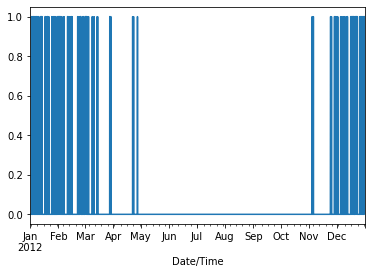

In [158]:
is_snowing.plot()

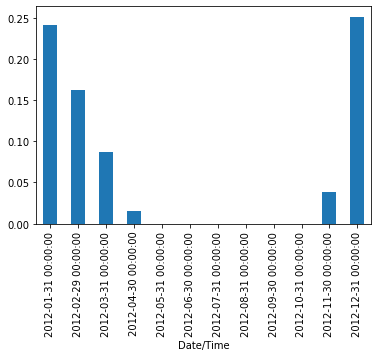

In [159]:
is_snowing.resample('M').mean().plot(kind='bar')

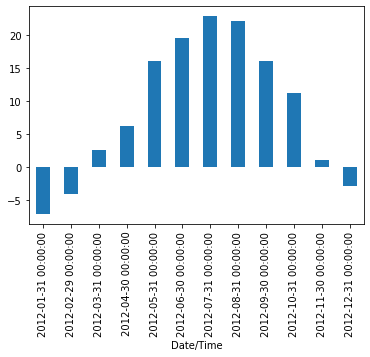

In [160]:
df["Temp (C)"].resample('M').median().plot(kind='bar')

### Combining dataframes

Used to combine different dataset based on keys

* concat(list): simply add list elements (dataframes) together along an axis, the missing values will be replaced by NaN
* dataframe_1.join(dataframe_2, lsuffix="", rsuffix=""): join dataframe_1 and dataframe_2 with index, if both dataframes contain a same column name, lsuffix and rsuffix will be added to column name
* merge(): merge dataframe on a specific column

We have the same possibilities than a database join (inner, left, right, outer...)

In [161]:
original_df = read_data()
original_df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [162]:
col_type_dict = get_column_by_types(original_df)
col_type_dict

{'numerical': ['points', 'price'],
 'bool': [],
 'object': ['country',
  'description',
  'designation',
  'province',
  'region_1',
  'region_2',
  'variety',
  'winery'],
 'datetime': [],
 'category': []}

In [163]:
numerical_df = original_df[col_type_dict['numerical']]
numerical_df.head()

,points,price
0,96,235.0
1,96,110.0
2,96,90.0
3,96,65.0
4,95,66.0


In [164]:
object_df = original_df[col_type_dict['object']]
object_df.head()

,country,description,designation,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [165]:
pd.concat([numerical_df, object_df])

,points,price,country,description,designation,province,region_1,region_2,variety,winery
0,96.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,96.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,96.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,95.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
150925,NaN,NaN,Italy,Many people feel Fiano represents southern Ita...,NaN,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,NaN,NaN,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,NaN,NaN,Italy,This classic example comes from a cru vineyard...,Terre di Dora,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,NaN,NaN,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [166]:
join_df = object_df.join(numerical_df)
join_df.head()

,country,description,designation,province,region_1,region_2,variety,winery,points,price
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,96,235.0
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,96,110.0
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,96,90.0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,96,65.0
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,95,66.0


In [167]:
df_1 = pd.DataFrame([['a', 1], ['b', 2]], columns=["letter", "number"])
df_1

,letter,number
0,a,1
1,b,2


In [168]:
df_2 = pd.DataFrame([['c', 3], ['d', 4]], columns=["letter", "number"])
df_2

,letter,number
0,c,3
1,d,4


In [169]:
df_3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']], columns=['letter', 'number', 'animal'])
df_3

,letter,number,animal
0,c,3,cat
1,d,4,dog


In [170]:
pd.concat([df_1, df_2])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [171]:
pd.concat([df_1, df_3])

,letter,number,animal
0,a,1,NaN
1,b,2,NaN
0,c,3,cat
1,d,4,dog


In [172]:
pd.concat([df_1, df_3], join="inner").reset_index()

,index,letter,number
0,0,a,1
1,1,b,2
2,0,c,3
3,1,d,4


In [173]:
fire_power_df = pd.read_csv('data/global_fire_power.csv')
fire_power_df.head()

,Country,ISO3,Rank,Total Population,Manpower Available,Fit-for-Service,Reaching Military Age,Total Military Personnel,Active Personnel,Reserve Personnel,...,Railway Coverage (km),Serivecable Airports,Defense Budget,External Debt,Foreign Exchange / Gold,Purchasing Power Parity,Square Land Area (km),Coastline (km),Shared Borders (km),Waterways (km)
0,United States,USA,1,323995528,145215000,120025000,4220000,2363675,1373650,990025,...,224792,13513,587800,17910000,117600,18560000,9826675,19924,12048,41009
1,Russia,RUS,2,142355415,70000000,47000000,1355000,3371027,798527,2572500,...,87157,1218,44600,514800,365500,3745000,17098242,37653,22408,102000
2,China,CHN,3,1373541278,750000000,619000000,19550000,3712500,2260000,1452500,...,86000,507,161700,983500,3092000,21270000,9596961,14500,22457,110000
3,India,IND,4,1266883598,616000000,489600000,22900000,4207250,1362500,2844750,...,63974,346,51000,507000,359100,8721000,3287263,7000,13888,14500
4,France,FRA,5,66836154,30000000,23750000,775000,387635,204000,183635,...,29640,464,35000,5360000,138200,2737000,643801,4853,4072,8501


In [174]:
country_gdp_df = pd.read_csv('data/country_gdp.csv')
country_gdp_df.rename(columns={'Code': 'ISO3'}, inplace=True)
country_gdp_df.head()

,Country,ISO3,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [175]:
merged = pd.merge(fire_power_df, country_gdp_df, on="ISO3") # inner join
merged.head()

,Country_x,ISO3,Rank,Total Population,Manpower Available,Fit-for-Service,Reaching Military Age,Total Military Personnel,Active Personnel,Reserve Personnel,...,External Debt,Foreign Exchange / Gold,Purchasing Power Parity,Square Land Area (km),Coastline (km),Shared Borders (km),Waterways (km),Country_y,Population,GDP per Capita
0,United States,USA,1,323995528,145215000,120025000,4220000,2363675,1373650,990025,...,17910000,117600,18560000,9826675,19924,12048,41009,United States,3.214188e+08,56115.718426
1,Russia,RUS,2,142355415,70000000,47000000,1355000,3371027,798527,2572500,...,514800,365500,3745000,17098242,37653,22408,102000,Russia,1.440968e+08,9092.580536
2,China,CHN,3,1373541278,750000000,619000000,19550000,3712500,2260000,1452500,...,983500,3092000,21270000,9596961,14500,22457,110000,China,1.371220e+09,8027.683810
3,India,IND,4,1266883598,616000000,489600000,22900000,4207250,1362500,2844750,...,507000,359100,8721000,3287263,7000,13888,14500,India,1.311051e+09,1598.259034
4,France,FRA,5,66836154,30000000,23750000,775000,387635,204000,183635,...,5360000,138200,2737000,643801,4853,4072,8501,France,6.680838e+07,36205.568102


In [176]:
light_merge = pd.merge(country_gdp_df, fire_power_df[["Country", "ISO3", "Manpower Available", "Railway Coverage (km)"]])
light_merge.head()

,Country,ISO3,Population,GDP per Capita,Manpower Available,Railway Coverage (km)
0,Afghanistan,AFG,32526562.0,594.323081,14000000,0
1,Albania,ALB,2889167.0,3945.217582,1515000,339
2,Algeria,ALG,39666519.0,4206.031232,20400000,3973
3,Angola,ANG,25021974.0,4101.472152,6030000,2764
4,Argentina,ARG,43416755.0,13431.878340,20000000,36966


In [177]:
pd.merge(country_gdp_df, fire_power_df[["Country", "ISO3", "Manpower Available", "Railway Coverage (km)"]], on="ISO3", how="outer", indicator=True)

,Country_x,ISO3,Population,GDP per Capita,Country_y,Manpower Available,Railway Coverage (km),_merge
0,Afghanistan,AFG,32526562.0,594.323081,Afghanistan,14000000.0,0.0,both
1,Albania,ALB,2889167.0,3945.217582,Albania,1515000.0,339.0,both
2,Algeria,ALG,39666519.0,4206.031232,Algeria,20400000.0,3973.0,both
3,American Samoa*,ASA,55538.0,NaN,NaN,NaN,NaN,left_only
4,Andorra,AND,70473.0,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...
239,NaN,ESL,NaN,NaN,El Salvador,3100000.0,283.0,right_only
240,NaN,CAR,NaN,NaN,Central African Republic,2300000.0,0.0,right_only
241,NaN,MAU,NaN,NaN,Mauritania,1523335.0,728.0,right_only
242,NaN,SIE,NaN,NaN,Sierra Leone,1402400.0,0.0,right_only


### Drop data / add data

Drop

* dropna() will remove all lines where there is a missing value
* dropna(axis='columns') will remove all columns where there is a missing value
* dropna(how='all') will remove lines where all elements are missing
* dropna(subset=[]) check columns in list for NA
* drop_duplicates(): drop duplicates rows (need to have all cells equals). We can provide parameters to specify what we want to consider as duplicates (subset, keep)

Fill 

* fillna(v) will replace all NaN by this value
* fillna(method='ffill') forward fill NaN value, exists with bfill
* fillna(value=dict()) specifies what columns should get what value 

In [178]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman', pd.NaT],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip', np.nan],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT, np.nan]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT
3,NaT,NaN,NaT


In [179]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [180]:
df.dropna(axis='columns')

""
0
1
2
3


In [181]:
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [182]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [183]:
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


In [184]:
df.fillna(method='ffill')

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,NaN,5
3,3.0,3.0,NaN,4


In [185]:
df.fillna(method='bfill')

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,3.0,NaN,5
3,NaN,3.0,NaN,4


In [186]:
df.fillna(value={
    'A': 0, 'B': 1, 'C': 2, 'D': 3
})

,A,B,C,D
0,0.0,2.0,2.0,0
1,3.0,4.0,2.0,1
2,0.0,1.0,2.0,5
3,0.0,3.0,2.0,4


## Cross tabulation

Compute a simple cross tabulation of two (or more) factors. By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.

In [187]:
df = pd.read_csv('data/endangered_languages.csv')
df.columns = ["id", "english_names", "countries", "country_code", "endangerement", "no", "latitude", "longitude"]
df.head()

,id,english_names,countries,country_code,endangerement,no,latitude,longitude
0,1022,South Italian,Italy,ITA,Vulnerable,7500000.0,40.9798,15.2490
1,1023,Sicilian,Italy,ITA,Vulnerable,5000000.0,37.4399,14.5019
2,383,Low Saxon,"Germany, Denmark, Netherlands, Poland, Russian...","DEU, DNK, NLD, POL, RUS",Vulnerable,4800000.0,53.4029,10.3601
3,335,Belarusian,"Belarus, Latvia, Lithuania, Poland, Russian Fe...","BRB, LVA, LTU, POL, RUS, UKR",Vulnerable,4000000.0,53.9560,27.5756
4,382,Lombard,"Italy, Switzerland","ITA, CHE",Definitely endangered,3500000.0,45.7215,9.3273


In [188]:
df_2 = pd.crosstab(df["country_code"], df['endangerement'], margins=True)
df_2.head()

endangerement,Critically endangered,Definitely endangered,Extinct,Severely endangered,Vulnerable,All
country_code,,,,,,
AFG,2,5,0,4,1,12
"ALB, BGR, GRC, MKD, SRB",0,1,0,0,0,1
"ALB, BGR, MKD, ROU, SRB",0,0,0,0,1,1
"ALB, DEU, AUT, BRB, BIH, BGR, HRV, EST, FIN, FRA, GRC, HUN, ITA, LVA, LTU, MKD, NLD, POL, ROU, GBR, RUS, SVK, SVN, CHE, CZE, TUR, UKR, SRB, MNE",0,1,0,0,0,1
"ALB, DZA, BIH, BGR, HRV, GRC, MKD, MAR, ROU, TUR, SRB",0,0,0,1,0,1


In [189]:
df_2.sort_values(by=['Extinct', 'Definitely endangered', 'Critically endangered', 'Severely endangered', 'Vulnerable'], ascending=False)

endangerement,Critically endangered,Definitely endangered,Extinct,Severely endangered,Vulnerable,All
country_code,,,,,,
All,607,679,253,554,628,2721
USA,80,28,54,40,14,216
RUS,21,36,24,27,11,119
IDN,32,30,12,19,56,149
BRA,43,16,12,19,96,186
...,...,...,...,...,...,...
"LVA, RUS",0,0,0,0,1,1
NLD,0,0,0,0,1,1
NZL,0,0,0,0,1,1


In [190]:
def percentage_convert(var):
    return var / float(var[-1])

In [191]:
df_2 = pd.crosstab(df["country_code"], df['endangerement'], margins=True).apply(percentage_convert, axis=1)
df_2.head()

endangerement,Critically endangered,Definitely endangered,Extinct,Severely endangered,Vulnerable,All
country_code,,,,,,
AFG,0.166667,0.416667,0.0,0.333333,0.083333,1.0
"ALB, BGR, GRC, MKD, SRB",0.000000,1.000000,0.0,0.000000,0.000000,1.0
"ALB, BGR, MKD, ROU, SRB",0.000000,0.000000,0.0,0.000000,1.000000,1.0
"ALB, DEU, AUT, BRB, BIH, BGR, HRV, EST, FIN, FRA, GRC, HUN, ITA, LVA, LTU, MKD, NLD, POL, ROU, GBR, RUS, SVK, SVN, CHE, CZE, TUR, UKR, SRB, MNE",0.000000,1.000000,0.0,0.000000,0.000000,1.0
"ALB, DZA, BIH, BGR, HRV, GRC, MKD, MAR, ROU, TUR, SRB",0.000000,0.000000,0.0,1.000000,0.000000,1.0


## Reshape

* stack(): pivot the columns as rows for each ID. Not required to do that but sometimes it takes more sense to look at the data this way.
* melt(): change the ID with other columns that can be considered identifier variables. All other columns are considered measured variables.

In [192]:
df = pd.read_csv('data/endangered_languages.csv')
df.columns = ["id", "english_names", "countries", "country_code", "endangerement", "number_of_speakers", "latitude", "longitude"]
df.head()

,id,english_names,countries,country_code,endangerement,number_of_speakers,latitude,longitude
0,1022,South Italian,Italy,ITA,Vulnerable,7500000.0,40.9798,15.2490
1,1023,Sicilian,Italy,ITA,Vulnerable,5000000.0,37.4399,14.5019
2,383,Low Saxon,"Germany, Denmark, Netherlands, Poland, Russian...","DEU, DNK, NLD, POL, RUS",Vulnerable,4800000.0,53.4029,10.3601
3,335,Belarusian,"Belarus, Latvia, Lithuania, Poland, Russian Fe...","BRB, LVA, LTU, POL, RUS, UKR",Vulnerable,4000000.0,53.9560,27.5756
4,382,Lombard,"Italy, Switzerland","ITA, CHE",Definitely endangered,3500000.0,45.7215,9.3273


In [193]:
stack = df.stack()
stack

0     id                                1022
      english_names            South Italian
      countries                        Italy
      country_code                       ITA
      endangerement               Vulnerable
                               ...          
2721  countries                         Oman
      country_code                       OMN
      endangerement    Critically endangered
      latitude                       23.4027
      longitude                      58.0957
Length: 21585, dtype: object

In [194]:
df_2 = stack.unstack()
df_2.head()

,id,english_names,countries,country_code,endangerement,number_of_speakers,latitude,longitude
0,1022,South Italian,Italy,ITA,Vulnerable,7.5e+06,40.9798,15.249
1,1023,Sicilian,Italy,ITA,Vulnerable,5e+06,37.4399,14.5019
2,383,Low Saxon,"Germany, Denmark, Netherlands, Poland, Russian...","DEU, DNK, NLD, POL, RUS",Vulnerable,4.8e+06,53.4029,10.3601
3,335,Belarusian,"Belarus, Latvia, Lithuania, Poland, Russian Fe...","BRB, LVA, LTU, POL, RUS, UKR",Vulnerable,4e+06,53.956,27.5756
4,382,Lombard,"Italy, Switzerland","ITA, CHE",Definitely endangered,3.5e+06,45.7215,9.3273


## Pivot

reshape data based on column values (must be unique for index/columns to form axes of the resulting DataFrame)

Can be used with columns with non unique values by using aggfunc parameter

In [195]:
df = pd.read_csv('data/global_fire_power.csv')
df.head()

,Country,ISO3,Rank,Total Population,Manpower Available,Fit-for-Service,Reaching Military Age,Total Military Personnel,Active Personnel,Reserve Personnel,...,Railway Coverage (km),Serivecable Airports,Defense Budget,External Debt,Foreign Exchange / Gold,Purchasing Power Parity,Square Land Area (km),Coastline (km),Shared Borders (km),Waterways (km)
0,United States,USA,1,323995528,145215000,120025000,4220000,2363675,1373650,990025,...,224792,13513,587800,17910000,117600,18560000,9826675,19924,12048,41009
1,Russia,RUS,2,142355415,70000000,47000000,1355000,3371027,798527,2572500,...,87157,1218,44600,514800,365500,3745000,17098242,37653,22408,102000
2,China,CHN,3,1373541278,750000000,619000000,19550000,3712500,2260000,1452500,...,86000,507,161700,983500,3092000,21270000,9596961,14500,22457,110000
3,India,IND,4,1266883598,616000000,489600000,22900000,4207250,1362500,2844750,...,63974,346,51000,507000,359100,8721000,3287263,7000,13888,14500
4,France,FRA,5,66836154,30000000,23750000,775000,387635,204000,183635,...,29640,464,35000,5360000,138200,2737000,643801,4853,4072,8501


In [196]:
df_2 = pd.pivot_table(df, index=["Country", "ISO3"])
df_2.head()

,,Active Personnel,Aircraft Carriers,Armored Fighting Vehicles,Attack Aircraft,Attack Helicopters,Combat Tanks,Consumption (bbl/dy),Corvettes,Defense Budget,Destroyers,...,Square Land Area (km),Submarines,Total Aircraft Strength,Total Helicopter Strength,Total Military Personnel,Total Naval Assets,Total Population,Towed Artillery,Trainer Aircraft,Transport Aircraft
Country,ISO3,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,200000,0,9562,15,6,0,50000,0,11500,0,...,652230,0,205,142,200000,0,33332025,200,0,158
Albania,ALB,50000,0,933,0,0,0,40000,0,110,0,...,28748,0,23,23,64000,38,3038594,0,0,23
Algeria,ALG,520000,0,6754,99,38,2405,350000,13,10570,0,...,2381741,6,502,257,792350,85,40263711,270,68,266
Angola,ANG,107000,0,538,78,15,244,133000,0,4150,0,...,1246700,0,285,118,175500,57,20172332,332,48,128
Argentina,ARG,75000,0,828,64,0,390,760000,9,4330,4,...,2780400,3,248,86,127720,42,43886748,289,59,102


In [197]:
df_3 = pd.pivot_table(df, index=["Country", "ISO3", "Rank"], values=["Attack Aircraft", "Active Personnel"])
df_3.head()

,,,Active Personnel,Attack Aircraft
Country,ISO3,Rank,,
Afghanistan,AFG,69,200000,15
Albania,ALB,90,50000,0
Algeria,ALG,25,520000,99
Angola,ANG,51,107000,78
Argentina,ARG,35,75000,64


In [198]:
df = pd.read_csv('data/endangered_languages.csv')
df.columns = ["id", "english_names", "countries", "country_code", "endangerement", "number_of_speakers", "latitude", "longitude"]
df.head()

,id,english_names,countries,country_code,endangerement,number_of_speakers,latitude,longitude
0,1022,South Italian,Italy,ITA,Vulnerable,7500000.0,40.9798,15.2490
1,1023,Sicilian,Italy,ITA,Vulnerable,5000000.0,37.4399,14.5019
2,383,Low Saxon,"Germany, Denmark, Netherlands, Poland, Russian...","DEU, DNK, NLD, POL, RUS",Vulnerable,4800000.0,53.4029,10.3601
3,335,Belarusian,"Belarus, Latvia, Lithuania, Poland, Russian Fe...","BRB, LVA, LTU, POL, RUS, UKR",Vulnerable,4000000.0,53.9560,27.5756
4,382,Lombard,"Italy, Switzerland","ITA, CHE",Definitely endangered,3500000.0,45.7215,9.3273


In [199]:
df_2 = pd.pivot_table(df, index=['country_code', 'endangerement'], values=["number_of_speakers"], aggfunc=np.sum)
df_2.head()

number_of_speakers
country_code            endangerement                            
AFG                     Critically endangered               300.0
                        Definitely endangered             14000.0
                        Severely endangered                4200.0
                        Vulnerable                            0.0
ALB, BGR, GRC, MKD, SRB Definitely endangered            500000.0

## Ranking

compute numerical data ranks (1 through n) along axis. Equal values are assigned a rank that is the average of the tanks of those values.

Can be good to create new features like ranking of salary for NBA players, ...

In [200]:
df = pd.DataFrame(data={'Animal': ['cat', 'penguin', 'dog',
                                   'spider', 'snake'],
                        'Number_legs': [4, 2, 4, 8, np.nan]})
df

,Animal,Number_legs
0,cat,4.0
1,penguin,2.0
2,dog,4.0
3,spider,8.0
4,snake,NaN


In [201]:
df['default_rank'] = df['Number_legs'].rank()
df['max_rank'] = df['Number_legs'].rank(method='max')
df['NA_bottom'] = df['Number_legs'].rank(na_option='bottom')
df['pct_rank'] = df['Number_legs'].rank(pct=True)
df

,Animal,Number_legs,default_rank,max_rank,NA_bottom,pct_rank
0,cat,4.0,2.5,3.0,2.5,0.625
1,penguin,2.0,1.0,1.0,1.0,0.250
2,dog,4.0,2.5,3.0,2.5,0.625
3,spider,8.0,4.0,4.0,4.0,1.000
4,snake,NaN,NaN,NaN,5.0,NaN


## Dataframe to python object

* to_frame(): series to dataframe
* tolist()
* to_dict()

In [202]:
df = read_data()
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [203]:
df.country.to_frame()

,country
0,US
1,Spain
2,US
3,US
4,France
...,...
150925,Italy
150926,France
150927,Italy
150928,France


In [204]:
df.country.tolist()[:5]

['US', 'Spain', 'US', 'US', 'France']

In [205]:
len(df["province"].to_dict().items())

150930

In [206]:
", ".join(df["country"].dropna().drop_duplicates().sort_values())

'Albania, Argentina, Australia, Austria, Bosnia and Herzegovina, Brazil, Bulgaria, Canada, Chile, China, Croatia, Cyprus, Czech Republic, Egypt, England, France, Georgia, Germany, Greece, Hungary, India, Israel, Italy, Japan, Lebanon, Lithuania, Luxembourg, Macedonia, Mexico, Moldova, Montenegro, Morocco, New Zealand, Portugal, Romania, Serbia, Slovakia, Slovenia, South Africa, South Korea, Spain, Switzerland, Tunisia, Turkey, US, US-France, Ukraine, Uruguay'

## Library: pandas_datareader

for financial data, auto retrieve data from the web

In [207]:
df = data.DataReader(name='MSFT', data_source="yahoo", start="2010-01-01", end="2020-12-31")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,24.226894
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,24.234720
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,24.085989
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.835503
2010-01-08,30.879999,30.240000,30.280001,30.660000,51197400.0,23.999893
